In [65]:
import pandas as pd
import matplotlib.pyplot as plt

---
## Leitura dos Dados

In [66]:
# Leitura do dataset (limpo) de bens dos candidatos
df_bens = pd.read_csv('data/cleaned/bens_candidatos_brasil.csv', sep=';', encoding='utf-8')
df_bens.head()

,SG_UF,SG_UE,NM_UE,SQ_CANDIDATO,CD_TIPO_BEM_CANDIDATO,DS_TIPO_BEM_CANDIDATO,VR_BEM_CANDIDATO
0,TO,TO,TOCANTINS,270001697127,11,APARTAMENTO,23000.0
1,TO,TO,TOCANTINS,270001697127,11,APARTAMENTO,905270.0
2,TO,TO,TOCANTINS,270001697127,21,"VEICULO AUTOMOTOR TERRESTRE: CAMINHAO, AUTOMOV...",15000.0
3,TO,TO,TOCANTINS,270001697127,21,"VEICULO AUTOMOTOR TERRESTRE: CAMINHAO, AUTOMOV...",35800.0
4,TO,TO,TOCANTINS,270001697127,21,"VEICULO AUTOMOTOR TERRESTRE: CAMINHAO, AUTOMOV...",78000.0


In [67]:
# Leitura do dataset (limpo) de despesas dos candidatos
df_despesas = pd.read_csv('data/cleaned/despesas_candidatos_brasil.csv', sep=';', encoding='utf-8')
df_despesas.head()

,ST_TURNO,SG_UF,SG_UE,SQ_CANDIDATO,CD_ORIGEM_DESPESA,DS_ORIGEM_DESPESA,DS_DESPESA,VR_DESPESA_CONTRATADA
0,1,AC,AC,10001623440,20800000,ATIVIDADES DE MILITANCIA E MOBILIZACAO DE RUA,PANFLETAGEM BANDEIRACO ATUACAO EM COMITE,1200.0
1,1,AC,AC,10001601556,20800000,ATIVIDADES DE MILITANCIA E MOBILIZACAO DE RUA,ATIV PANFLET.BANDEIRACO.ATUA COMITE,1200.0
2,1,AC,AC,10001623440,20800000,ATIVIDADES DE MILITANCIA E MOBILIZACAO DE RUA,ATIV PANFLET.BANDEIRACO.ATUA COMITE - 16 DIAS ...,500.0
3,1,AC,AC,10001623440,20800000,ATIVIDADES DE MILITANCIA E MOBILIZACAO DE RUA,PANFLETAGEM BANDEIRACO ATUACAO EM COMITE,1200.0
4,1,AC,AC,10001623440,20800000,ATIVIDADES DE MILITANCIA E MOBILIZACAO DE RUA,PANFLETAGEM BANDEIRACO ATUACAO EM COMITE,1000.0


In [68]:
# Leitura do dataset (limpo) de receitas dos candidatos
df_votacao = pd.read_csv('data/cleaned/votacao_nominal_brasil.csv', sep=';', encoding='utf-8')
df_votacao.head(30)

,NR_TURNO,SG_UF,SG_UE,NM_UE,CD_CARGO,DS_CARGO,SQ_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,SG_PARTIDO,NM_PARTIDO,QT_VOTOS_NOMINAIS,QT_VOTOS_NOMINAIS_VALIDOS,CD_SIT_TOT_TURNO,DS_SIT_TOT_TURNO
0,1,CE,CE,CEARA,3,GOVERNADOR,60001608845,WAGNER SOUSA GOMES,CAPITAO WAGNER,UNIAO,UNIAO BRASIL,5468,5468,4,NAO ELEITO
1,1,CE,CE,CEARA,3,GOVERNADOR,60001608845,WAGNER SOUSA GOMES,CAPITAO WAGNER,UNIAO,UNIAO BRASIL,6727,6727,4,NAO ELEITO
2,1,CE,CE,CEARA,3,GOVERNADOR,60001608845,WAGNER SOUSA GOMES,CAPITAO WAGNER,UNIAO,UNIAO BRASIL,2106,2106,4,NAO ELEITO
3,1,CE,CE,CEARA,3,GOVERNADOR,60001608845,WAGNER SOUSA GOMES,CAPITAO WAGNER,UNIAO,UNIAO BRASIL,16865,16865,4,NAO ELEITO
4,1,CE,CE,CEARA,3,GOVERNADOR,60001608845,WAGNER SOUSA GOMES,CAPITAO WAGNER,UNIAO,UNIAO BRASIL,3475,3475,4,NAO ELEITO
5,1,CE,CE,CEARA,3,GOVERNADOR,60001608845,WAGNER SOUSA GOMES,CAPITAO WAGNER,UNIAO,UNIAO BRASIL,12138,12138,4,NAO ELEITO
6,1,CE,CE,CEARA,3,GOVERNADOR,60001608845,WAGNER SOUSA GOMES,CAPITAO WAGNER,UNIAO,UNIAO BRASIL,1652,1652,4,NAO ELEITO
7,1,CE,CE,CEARA,3,GOVERNADOR,60001608845,WAGNER SOUSA GOMES,CAPITAO WAGNER,UNIAO,UNIAO BRASIL,5615,5615,4,NAO ELEITO
8,1,CE,CE,CEARA,3,GOVERNADOR,60001608845,WAGNER SOUSA GOMES,CAPITAO WAGNER,UNIAO,UNIAO BRASIL,39325,39325,4,NAO ELEITO
9,1,CE,CE,CEARA,3,GOVERNADOR,60001608845,WAGNER SOUSA GOMES,CAPITAO WAGNER,UNIAO,UNIAO BRASIL,32963,32963,4,NAO ELEITO


---
## Estatísticas Básicas - Bens dos Candidatos

In [69]:
# Calculando as médias de bens declarados
mean_asset_value  = df_bens['VR_BEM_CANDIDATO'].mean()
mean_by_state     = df_bens.groupby('NM_UE')['VR_BEM_CANDIDATO'].mean()
mean_by_candidate = df_bens.groupby('SQ_CANDIDATO')['VR_BEM_CANDIDATO'].mean()

# Calculando a mediana de bens declarados
median_asset_value = df_bens['VR_BEM_CANDIDATO'].median()

print(f"Média de bens declarados: R$ {mean_asset_value:.2f}")
print(f"Mediana de bens declarados: R$ {median_asset_value:.2f}")

Média de bens declarados: R$ 1049487.05
Mediana de bens declarados: R$ 62271.99


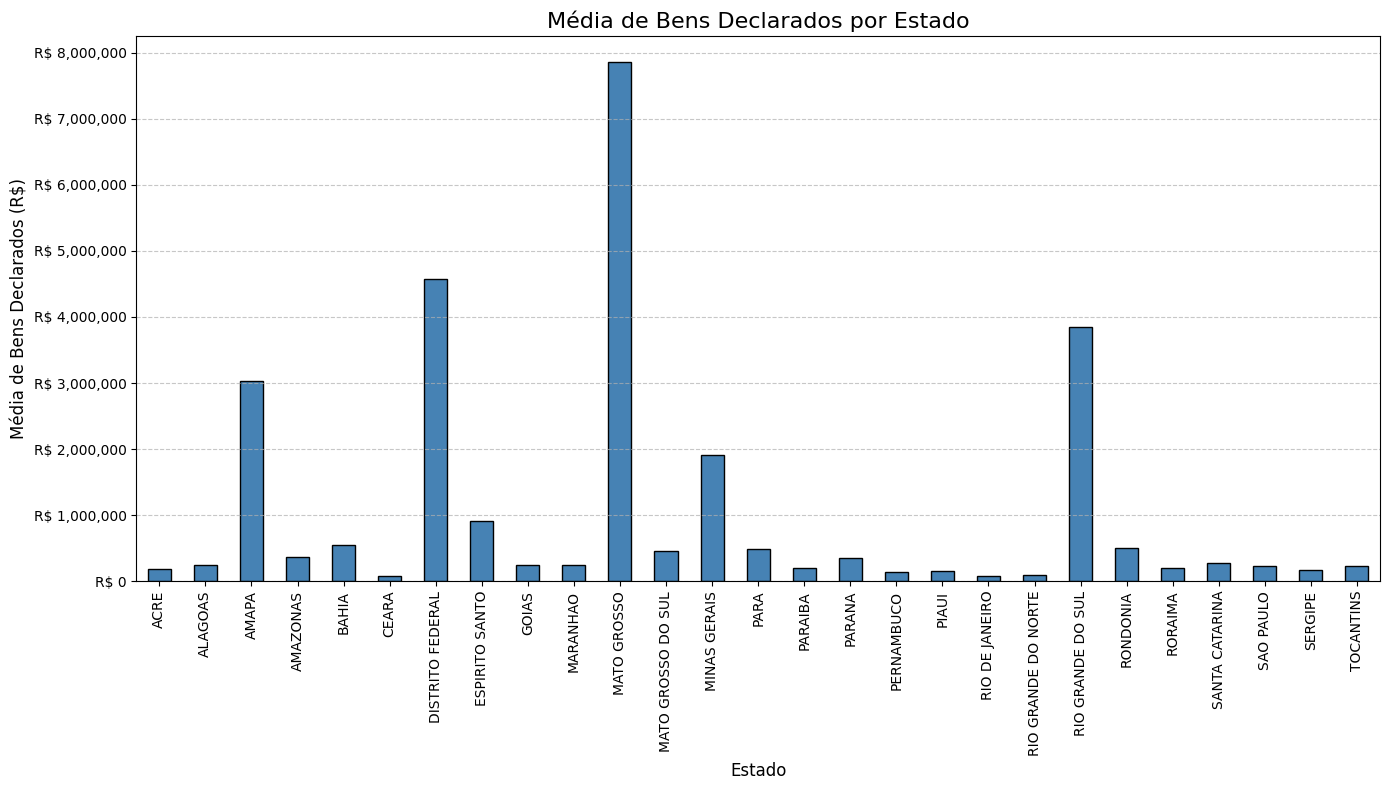

In [70]:
# Plotando a média de bens declarados por estado
plt.figure(figsize=(14, 8))
mean_by_state.plot(kind='bar', color='steelblue', edgecolor='black')
plt.title('Média de Bens Declarados por Estado', fontsize=16)
plt.xlabel('Estado', fontsize=12)
plt.ylabel('Média de Bens Declarados (R$)', fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.gca().get_yaxis().set_major_formatter(plt.matplotlib.ticker.FuncFormatter(lambda x, _: f'R$ {x:,.0f}'))

plt.tight_layout()
plt.show()

In [71]:
# Calculando total de instâncias, total de bens declarados e total de candidatos
sum_asset_value     = df_bens['VR_BEM_CANDIDATO'].sum()
count_assets        = df_bens['VR_BEM_CANDIDATO'].count()
total_candidates    = df_bens['SQ_CANDIDATO'].nunique()
candidates_by_state = df_bens.groupby('SG_UF')['SQ_CANDIDATO'].nunique()

print(f"\nTotal de bens declarados: R$ {sum_asset_value:.2f}")
print(f"Quantidade de bens declarados: {count_assets}")
print(f"Quantidade de candidatos: {total_candidates}")


Total de bens declarados: R$ 1792523875.72
Quantidade de bens declarados: 1708
Quantidade de candidatos: 185


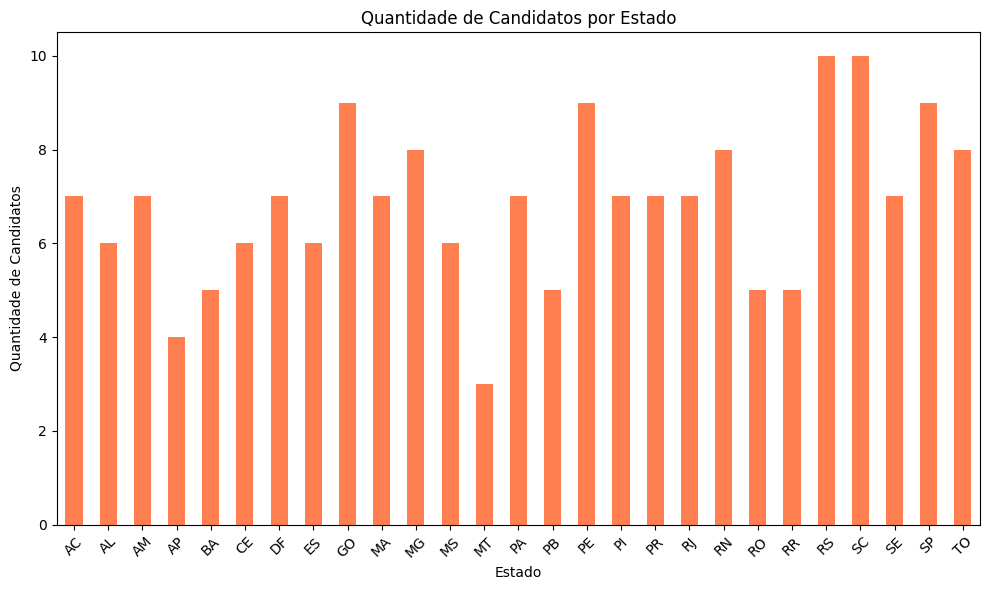

In [72]:
# Plotando a quantidade de candidatos por estado
plt.figure(figsize=(10, 6))
candidates_by_state.plot(kind='bar', color='coral')
plt.title('Quantidade de Candidatos por Estado')
plt.xlabel('Estado')
plt.ylabel('Quantidade de Candidatos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [73]:
# Calculando as variações de bens declarados
std_asset_value  = df_bens['VR_BEM_CANDIDATO'].std()
std_by_state     = df_bens.groupby('NM_UE')['VR_BEM_CANDIDATO'].std()
std_by_candidate = df_bens.groupby('SQ_CANDIDATO')['VR_BEM_CANDIDATO'].std()

print(f"Variação de bens declarados: R$ {std_asset_value:.2f}")

print("\nVariação de bens declarados por estado:")
for position, value in mean_by_state.items():
    print(f"{position}: R$ {value:.2f}")

print("\nVarição de bens declarados por candidato:")
for candidate, value in mean_by_candidate.items():
    print(f"Candidato {candidate}: R$ {value:.2f}")

Variação de bens declarados: R$ 14152398.02

Variação de bens declarados por estado:
ACRE: R$ 188670.13
ALAGOAS: R$ 242592.94
AMAPA: R$ 3023984.60
AMAZONAS: R$ 366026.75
BAHIA: R$ 541336.76
CEARA: R$ 78114.12
DISTRITO FEDERAL: R$ 4578035.00
ESPIRITO SANTO: R$ 908112.71
GOIAS: R$ 245910.12
MARANHAO: R$ 241866.41
MATO GROSSO: R$ 7864590.80
MATO GROSSO DO SUL: R$ 462637.19
MINAS GERAIS: R$ 1905135.26
PARA: R$ 487450.73
PARAIBA: R$ 192697.32
PARANA: R$ 343014.99
PERNAMBUCO: R$ 131296.72
PIAUI: R$ 149388.74
RIO DE JANEIRO: R$ 71840.48
RIO GRANDE DO NORTE: R$ 87669.42
RIO GRANDE DO SUL: R$ 3845379.28
RONDONIA: R$ 501673.83
RORAIMA: R$ 198099.16
SANTA CATARINA: R$ 279035.68
SAO PAULO: R$ 223579.64
SERGIPE: R$ 162840.16
TOCANTINS: R$ 224974.63

Varição de bens declarados por candidato:
Candidato 10001595336: R$ 171300.00
Candidato 10001601556: R$ 170182.94
Candidato 10001606307: R$ 6250.00
Candidato 10001612476: R$ 177978.74
Candidato 10001616169: R$ 192836.67
Candidato 10001623440: R$ 474819.

In [74]:
# Calculando a moda e a ocorrência dos tipos de bens declarados


---
## Estatísticas Básicas - Despesas dos Candidatos

In [80]:
#df_despesas
#média
mean_despesas = df_despesas['VR_DESPESA_CONTRATADA'].mean()
print(f"Média das despesas: R${mean_despesas:.2f}")
#mediana
median_despesas = df_despesas['VR_DESPESA_CONTRATADA'].median()
print(f"Mediana das despesas: R${median_despesas:.2f}")
#desvio padrao
std_despesas = df_despesas['VR_DESPESA_CONTRATADA'].std()
print(f"Desvio padrão das despesas: {std_despesas:.2f}")
#montante geral
sum_despesas = df_despesas['VR_DESPESA_CONTRATADA'].sum()
print(f"Montante geral das despesas: R${sum_despesas:.2f}")


mean_despesas_estado = df_despesas.groupby('SG_UF')['VR_DESPESA_CONTRATADA'].sum()



Média das despesas: R$7049.64
Mediana das despesas: R$650.00
Desvio padrão das despesas: 67998.86
Montante geral das despesas: R$834275748.10


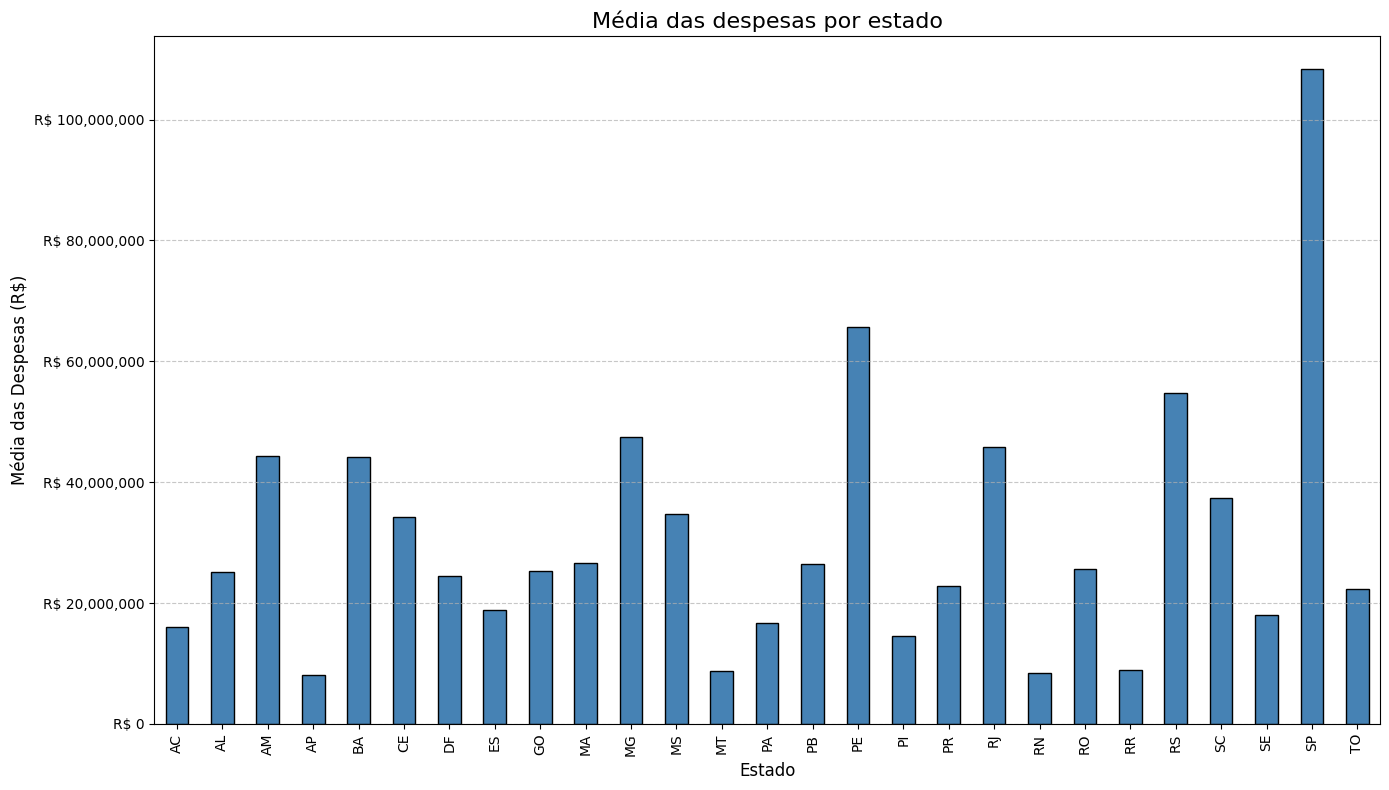

In [81]:
# Plotando a média de despesas por estado
plt.figure(figsize=(14, 8))
mean_despesas_estado.plot(kind='bar', color='steelblue', edgecolor='black')
plt.title('Média das despesas por estado', fontsize=16)
plt.xlabel('Estado', fontsize=12)
plt.ylabel('Média das Despesas (R$)', fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.gca().get_yaxis().set_major_formatter(plt.matplotlib.ticker.FuncFormatter(lambda x, _: f'R$ {x:,.0f}'))

plt.tight_layout()
plt.show()

---
## Estatísticas Básicas - Votação Nominal

In [ ]:
#df_votacao
sum_votos_total = df_votacao['QT_VOTOS_NOMINAIS_VALIDOS'].sum()
print(f"Soma total de votos válidos: {sum_votos_total}")


mean_votos_candidatos = df_votacao.groupby('NM_CANDIDATO')['QT_VOTOS_NOMINAIS_VALIDOS'].sum().mean()
print(f"Média de votos por candidato: {mean_votos_candidatos:.2f}")

median_votos_candidatos = df_votacao.groupby('NM_CANDIDATO')['QT_VOTOS_NOMINAIS_VALIDOS'].sum().median()
print(f"Mediana de votos por candidato: {median_votos_candidatos:.2f}")

std_votos_candidatos = df_votacao.groupby('NM_CANDIDATO')['QT_VOTOS_NOMINAIS_VALIDOS'].sum().std()
print(f"Desvio padrão: {std_votos_candidatos:.2f}")



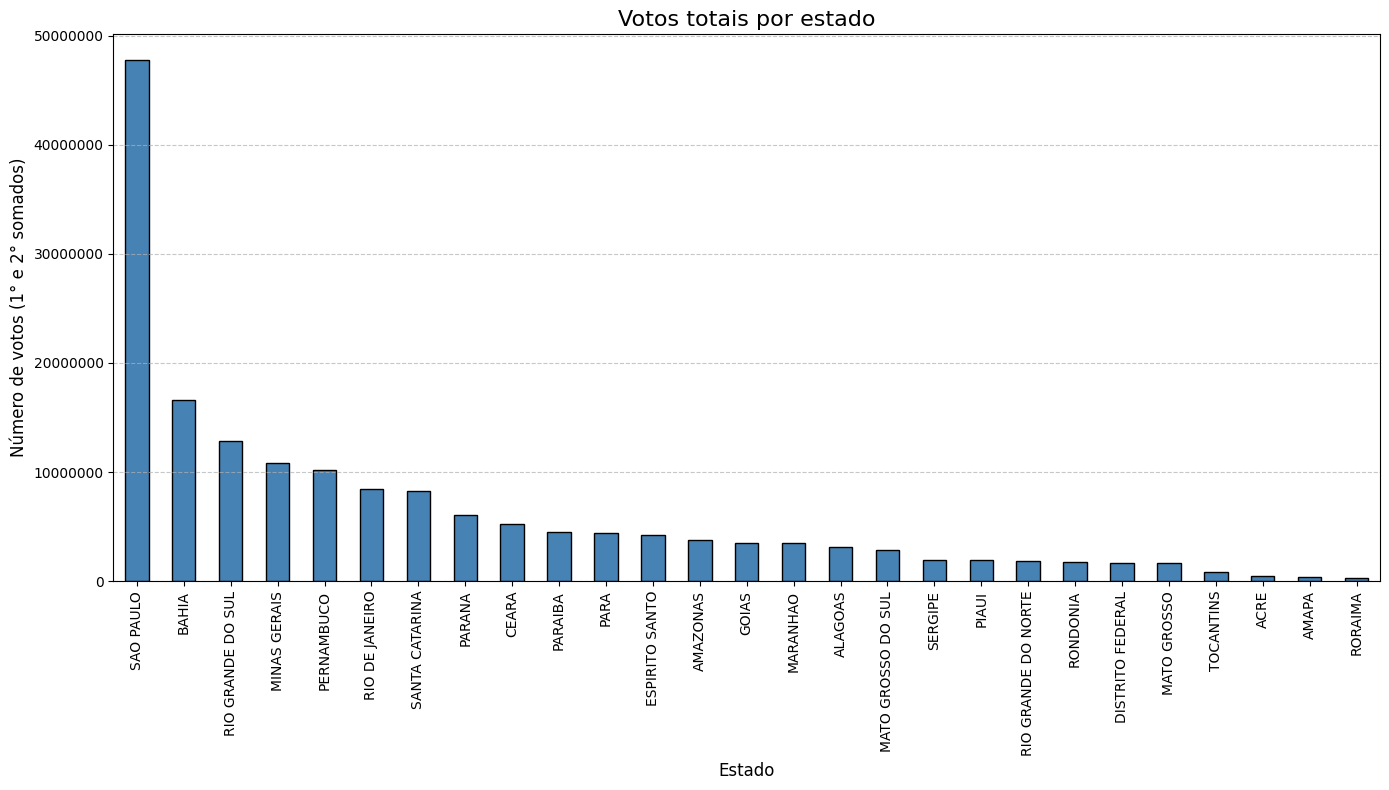

In [103]:
# Plotando votos por estado
votos = df_votacao.groupby(['NM_UE'])['QT_VOTOS_NOMINAIS_VALIDOS'].sum()
votos = votos.sort_values(ascending=False)
plt.figure(figsize=(14, 8))
votos.plot(kind='bar', color='steelblue', edgecolor='black')
plt.title('Votos totais por estado', fontsize=16)
plt.xlabel('Estado', fontsize=12)
plt.ylabel('Número de votos (1° e 2° somados)', fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ticklabel_format(style='plain', axis='y')


plt.tight_layout()
plt.show()

---
## Detecção de Outliers

---
## Correlações